# ITEM BASED MOVIE RECOMMENDATION

Movies are recommended based on the ratings given by all users \
Correlation is used to determine similar movies to be recommended based on a movie. \
Then KNN algo from ML is used to find the similar movies.

In [1]:
import pandas as pd
import numpy as np

lets consider movies and ratings csv files only for this lab

In [2]:
movies_df = pd.read_csv("movies.csv")
ratings_df = pd.read_csv("ratings.csv")

In [3]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies_df.drop("genres", axis=1, inplace = True)
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [5]:
movies_df.dtypes

movieId     int64
title      object
dtype: object

In [6]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [7]:
ratings_df.drop("timestamp", axis=1, inplace = True)
ratings_df.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [8]:
movies_df['title'].nunique()

62325

There are 62423 movies in the dataset

In [9]:
ratings_df['userId'].nunique()

162541

There are 162541 users in the dataset

### EDA and Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = movies_df.merge(ratings_df, on = 'movieId')

In [12]:
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),2,3.5
1,1,Toy Story (1995),3,4.0
2,1,Toy Story (1995),4,3.0
3,1,Toy Story (1995),5,4.0
4,1,Toy Story (1995),8,4.0


In [13]:
df.shape

(25000095, 4)

Let's create a ratings dataframe with average rating and number of ratings:

In [14]:
#Total number of people rated a movie
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 81491
Shawshank Redemption, The (1994)    81482
Pulp Fiction (1994)                 79672
Silence of the Lambs, The (1991)    74127
Matrix, The (1999)                  72674
Name: rating, dtype: int64

In [15]:
#average rating of a movie
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Full of Grace (2015)            5.0
Geordie (1955)                  5.0
Garfield In Paradise (1986)     5.0
Lost Woods (2012)               5.0
Garfield in the Rough (1984)    5.0
Name: rating, dtype: float64

In [16]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.reset_index(inplace = True)

In [17]:
ratings['num of ratings'].min()

1

In [18]:
ratings['num of ratings'].max()

81491

In [19]:
ratings.head()

,title,rating,num of ratings
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",3.000000,1
1,"""Great Performances"" Cats (1998)",2.896648,179
2,#1 Cheerleader Camp (2010),2.111111,9
3,#Captured (2017),3.750000,2
4,#Female Pleasure (2018),3.666667,3


In [20]:
#average rating given to a movie Bank Job
ratings[ratings['title'] == 'Bank Job, The (2008)']

,title,rating,num of ratings
4974,"Bank Job, The (2008)",3.603864,2821


<Axes: xlabel='num of ratings', ylabel='Count'>

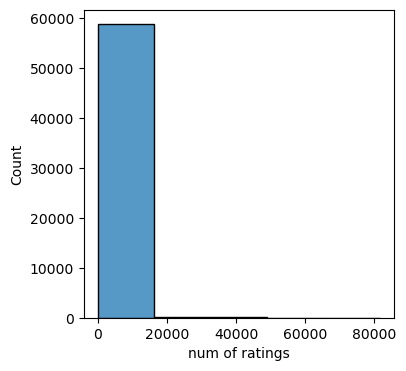

In [21]:
# plot a histogram based on number of ratings for a movie
plt.figure(figsize=(4,4))
sns.histplot(ratings['num of ratings'], bins=5)

It can be seen that maximum number of movies have number of ratings between 0 and 400, and very few have above 400 \
The original datset has maximum number of ratings given to a movie are between 0 and 40000

<Axes: xlabel='rating', ylabel='Count'>

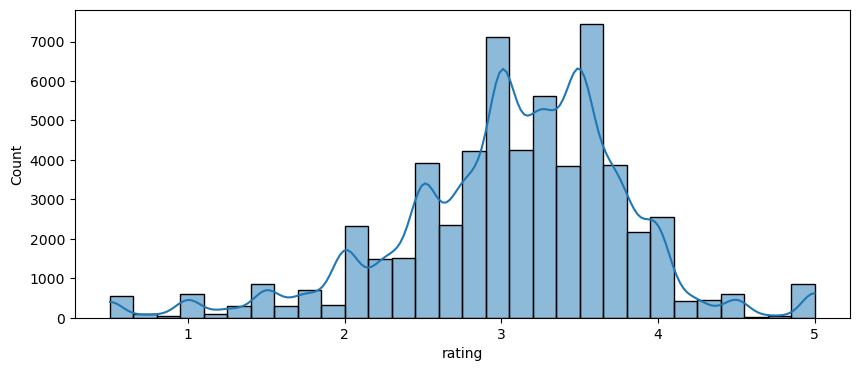

In [22]:
plt.figure(figsize=(10,4))
sns.histplot(ratings['rating'], bins = 30, kde = True)

Follows a somewhat gaussian/normal curve \
It shows most of the movies are rated between 2 and 4

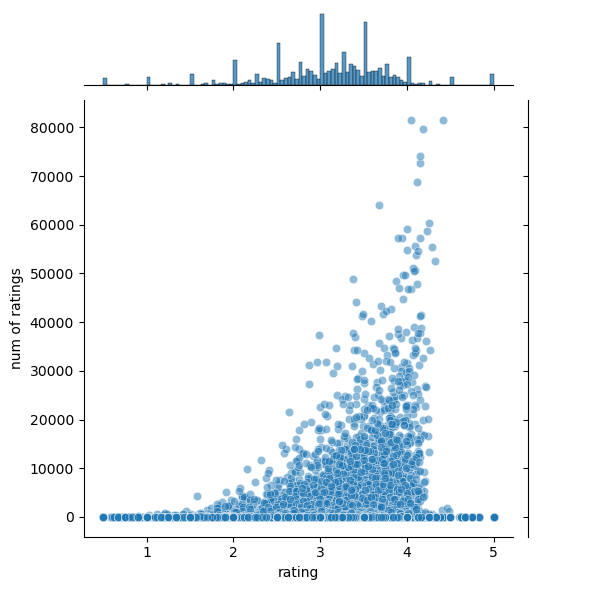

In [48]:
# implement the above two using a joint plot
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

### Recommending Similar Movies

In [23]:
dup_ratings=df[df.duplicated(subset=['userId','movieId'], keep=False)]
dup_ratings.head()

,movieId,title,userId,rating


There are no duplicate values, that is a same user has not rated a single movie twice

In [24]:
dff = df.sample(200000, random_state = 10)

In [25]:
dff = dff.reset_index(drop = True)
dff.head()

,movieId,title,userId,rating
0,1407,Scream (1996),125283,3.0
1,4022,Cast Away (2000),106565,4.0
2,7044,Wild at Heart (1990),7403,4.0
3,81229,Red (2010),142963,3.0
4,2795,National Lampoon's Vacation (1983),98067,3.0


In [26]:
#make a pivot table with user_id as row index, title as col index, and ratings as data.
movies_pivot = dff.pivot_table(index='userId', columns='title',values='rating')
movies_pivot.head()

title,"""Great Performances"" Cats (1998)",#Horror (2015),$9.99 (2008),'71 (2014),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(T)ERROR (2015),...,xXx (2002),xXx: Return of Xander Cage (2017),xXx: State of the Union (2005),¡Three Amigos! (1986),À nos amours (1983),À nous la liberté (Freedom for Us) (1931),Крепость: щитом и мечом (2015),Сердца трех (1992),Я худею (2018),貞子3D (2012)
userId,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There area lot of NaN values, because most people have not seen most of the movies.

#### Most rated movies:

In [27]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,title,rating,num of ratings
17622,Forrest Gump (1994),4.048011,81491
41782,"Shawshank Redemption, The (1994)",4.413576,81482
37867,Pulp Fiction (1994),4.188912,79672
42216,"Silence of the Lambs, The (1991)",4.151342,74127
30477,"Matrix, The (1999)",4.154099,72674
43927,Star Wars: Episode IV - A New Hope (1977),4.120189,68717
25275,Jurassic Park (1993),3.679175,64144
40816,Schindler's List (1993),4.247579,60411
7587,Braveheart (1995),4.002273,59184
16751,Fight Club (1999),4.228311,58773


Movies with best average ratings

In [28]:
ratings.sort_values('rating', ascending = False).head(10)

,title,rating,num of ratings
18213,Full of Grace (2015),5.0,1
18663,Geordie (1955),5.0,1
18508,Garfield In Paradise (1986),5.0,1
28687,Lost Woods (2012),5.0,1
18509,Garfield in the Rough (1984),5.0,1
28684,Lost Time (2014),5.0,1
57203,Who Killed Chea Vichea? (2010),5.0,1
28677,Lost Rivers (2013),5.0,1
57206,Who Killed Johnny (2013),5.0,1
18605,Generation Baby Buster (2011),5.0,1


The above table is not accurate as even though the movies have 5 rating, the num of people rated them is less.\
So we should conside movies that have atkeast 100 num of ratings

In [29]:
ratings[ratings['num of ratings'] > 100].sort_values('rating', ascending = False).head(10)

,title,rating,num of ratings
36804,Planet Earth II (2016),4.483096,1124
36803,Planet Earth (2006),4.464797,1747
41782,"Shawshank Redemption, The (1994)",4.413576,81482
4934,Band of Brothers (2001),4.398599,1356
11020,Cosmos,4.326715,277
19301,"Godfather, The (1972)",4.324336,52498
7005,Blue Planet II (2017),4.289833,659
55289,"Usual Suspects, The (1995)",4.284353,55366
54559,Twin Peaks (1989),4.267361,288
19302,"Godfather: Part II, The (1974)",4.261759,34188


Lets consider two movies and recommend a movie based on them

In [30]:
Shawshank_Redemption_user_ratings = movies_pivot['Shawshank Redemption, The (1994)']
Schindlers_List_user_ratings = movies_pivot["Schindler's List (1993)"]
Schindlers_List_user_ratings.sample(5)

userId
94329    NaN
103749   NaN
119400   NaN
106867   NaN
152610   NaN
Name: Schindler's List (1993), dtype: float64

The ratings given to movie Shawshank is correlated with all the columns in the movies_pivot, higher the correlation value, better to be recommended(num of ratings also matters i.e >100). \
We can then use corrwith() method to get correlations between two pandas series:

In [31]:
similar_to_shawshank = movies_pivot.corrwith(Shawshank_Redemption_user_ratings)
similar_to_schindlers = movies_pivot.corrwith(Schindlers_List_user_ratings)

C:\Users\Shreyas\anaconda3\envs\tf_gpu\lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Shreyas\anaconda3\envs\tf_gpu\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [32]:
corr_shawshank = pd.DataFrame(similar_to_shawshank,columns=['Correlation']).reset_index()
corr_shawshank.dropna(inplace=True)
corr_shawshank.head()

,title,Correlation
134,3000 Miles to Graceland (2001),1.000000
569,American Beauty (1999),1.000000
597,"American President, The (1995)",1.000000
709,Annie Hall (1977),1.000000
791,Armageddon (1998),-0.327327


sort values based on correlation \
note that as num of ratings>100 is not included the movies are not similar to shawshank redemption

In [33]:
corr_shawshank.sort_values('Correlation',ascending=False).head(10)

,title,Correlation
12991,Witness (1985),1.0
11767,There's Something About Mary (1998),1.0
7268,"Mask, The (1994)",1.0
4607,"Gods Must Be Crazy, The (1980)",1.0
8823,Pirates of the Caribbean: The Curse of the Bla...,1.0
5589,Identity (2003),1.0
11074,Tangled (2010),1.0
3063,Delicatessen (1991),1.0
5697,Inception (2010),1.0
12082,Transformers (2007),1.0


In [34]:
#include number of ratings from ratings dataframe and then sort values
corr_shawshank = corr_shawshank.join(ratings['num of ratings'])
corr_shawshank.sample(5)

,title,Correlation,num of ratings
5589,Identity (2003),1.000000,1
9841,Scary Movie (2000),1.000000,548
12717,"Wedding Singer, The (1998)",1.000000,2
569,American Beauty (1999),1.000000,7
4578,Glory (1989),-0.981981,11


In [35]:
corr_shawshank[corr_shawshank['num of ratings']>100].sort_values('Correlation',ascending=False).head(10)

,title,Correlation,num of ratings
3063,Delicatessen (1991),1.000000,2955
5697,Inception (2010),1.000000,212
597,"American President, The (1995)",1.000000,434
11940,Titanic (1997),1.000000,319
9841,Scary Movie (2000),1.000000,548
8296,Old Boy (2003),1.000000,208
6126,Jurassic Park (1993),0.523557,2986
12865,Who Framed Roger Rabbit? (1988),0.500000,7301
2838,Dances with Wolves (1990),0.277350,1007
5971,Jaws (1975),0.000000,165


We can see that Mission: Titanic (1997), Jurassic Park (1993) are similar to Shawshank and are popular, so can be recommended

Do the same for schindlers movie and find the similar movie to recommend

In [37]:
corr_schindlers = pd.DataFrame(similar_to_schindlers,columns=['Correlation']).reset_index()
corr_schindlers.dropna(inplace=True)
corr_schindlers = corr_schindlers.join(ratings['num of ratings'])
corr_schindlers[corr_schindlers['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,title,Correlation,num of ratings
2581,"Conversation, The (1974)",1.0,338
2944,Dead Again (1991),1.0,7379
5996,Jerry Maguire (1996),1.0,229
3350,Dr. Strangelove or: How I Learned to Stop Worr...,1.0,116
6087,Ju-on: The Grudge (2002),1.0,635


We can use the whole the dataset to get more good results

# Movie Recommendation using ML

KNearestNeighbors algorithm is used to find 10 similar movies
(unsupervised learning)

In [38]:
#ratings_df and movies_df data is required

In [39]:
ratings_df.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [40]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [41]:
ratings_dff = ratings_df.sample(300000, random_state = 10).reset_index(drop = True)
final_dataset = ratings_dff.pivot_table(index='movieId',columns='userId',values='rating')

In [42]:
ratings_dff.head()

,userId,movieId,rating
0,52190,54190,1.0
1,95985,2716,4.5
2,116796,1924,1.0
3,145822,52973,3.0
4,78743,3082,1.0


In [43]:
final_dataset.head()

userId,2,3,4,5,7,8,9,12,13,15,...,162529,162531,162532,162533,162534,162536,162537,162538,162540,162541
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are many NaN values as users would not have voted most movies 

In [44]:
#fill NaN with 0's
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,2,3,4,5,7,8,9,12,13,15,...,162529,162531,162532,162533,162534,162536,162537,162538,162540,162541
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


__Removing Noise from the data__ \
We wouldn’t want movies that were rated by a small number of users because it’s not credible enough. Similarly, users who have rated only a handful of movies should also not be taken into account. 
1. To qualify a movie, a minimum of 10 users should have voted a movie.
2. To qualify a user, a minimum of 50 movies should have voted by the user.

In [45]:
no_user_voted = ratings_dff.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings_dff.groupby('userId')['rating'].agg('count')

_Let’s visualize the number of users who voted with our threshold of 10._

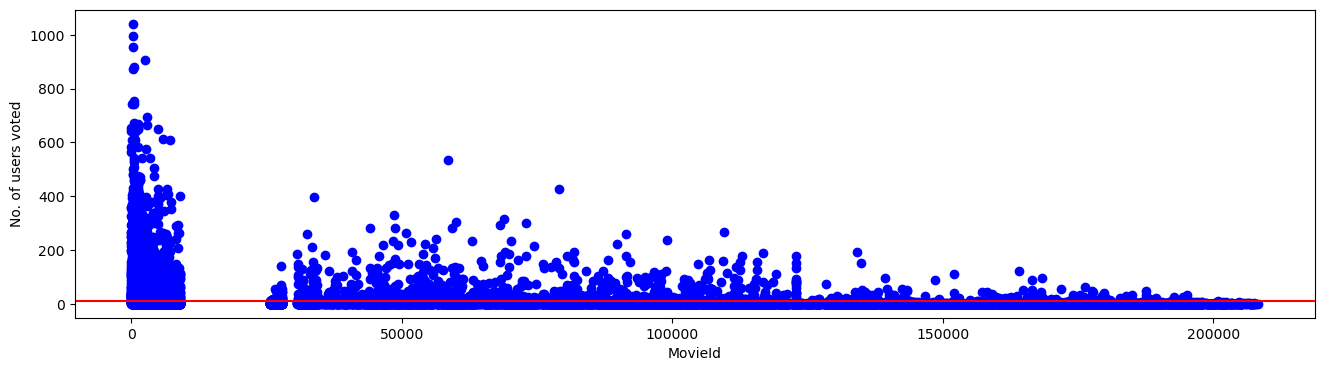

In [46]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color='blue')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [47]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

_visualize the number of votes by each user with our threshold of 50._

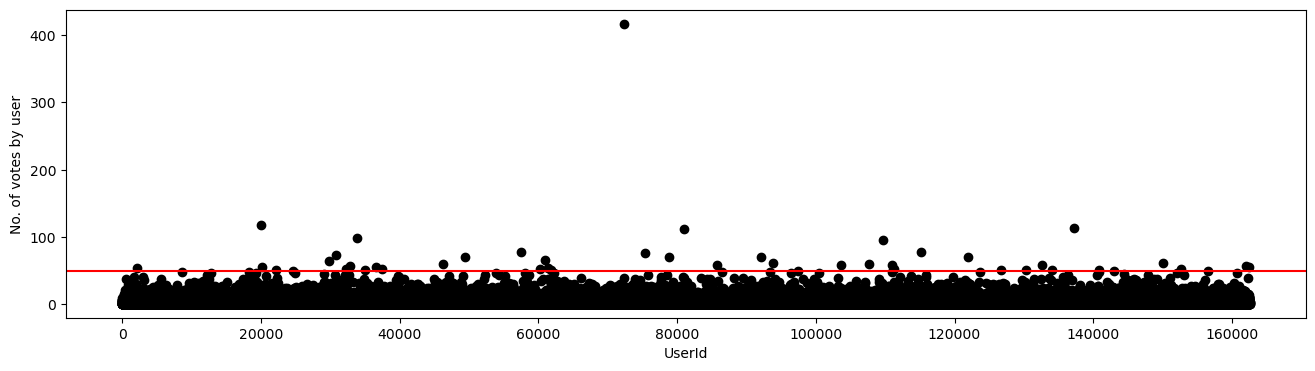

In [48]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='black')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

As most users have voted voted less than 50 times, we cannot remove them for model training

In [49]:
#final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,2,3,4,5,7,8,9,12,13,15,...,162529,162531,162532,162533,162534,162536,162537,162538,162540,162541
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


__Removing Sparsity__ \
The original large dataset of movie lens which has more than 100000 features, our system may run out of computational resources when that is feed to the model. 
To reduce the sparsity we use the csr_matrix function from the scipy library.

In [50]:
from scipy.sparse import csr_matrix
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [51]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
#check if movie name is title, if movie_list doesnt show anything like below then movie doesnt exist in the dataset
#if exists, get the movieId index of the movie
#get the indx of final_dataset['movieId']
#then use this index in knn to get distances and indices

In [52]:
movie_list = movies_df[movies_df['title'] == 'aa']
movie_list

,movieId,title


In [53]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies_df[movies_df['title'] == movie_name]  
    if len(movie_list):        
        movie_idx = movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies_df[movies_df['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies_df.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [54]:
movies_df[movies_df['movieId'] == 2716]

,movieId,title
2624,2716,Ghostbusters (a.k.a. Ghost Busters) (1984)


In [55]:
get_movie_recommendation('Ghostbusters (a.k.a. Ghost Busters) (1984)')

,Title,Distance
1,"Kid in King Arthur's Court, A (1995)",0.975628
2,Godzilla 2000 (Gojira ni-sen mireniamu) (1999),0.975348
3,Blank Check (1994),0.975132
4,Buffalo Soldiers (2001),0.974478
5,My Bodyguard (1980),0.973033
6,"Great Santini, The (1979)",0.972622
7,The Expendables 3 (2014),0.969444
8,Dunkirk (2017),0.968800
9,"Aristocrats, The (2005)",0.966873
10,"Incredible Journey, The (1963)",0.964066


In [56]:
get_movie_recommendation('Toy Story (1995)')

,Title,Distance
1,Lost in America (1985),0.981116
2,Fantastic Voyage (1966),0.980469
3,You Can Count on Me (2000),0.980447
4,Youth in Revolt (2009),0.980408
5,Dinosaur (2000),0.979698
6,Appleseed (Appurushîdo) (2004),0.978314
7,Meet Me in St. Louis (1944),0.978210
8,"Ref, The (1994)",0.976879
9,Joe's Apartment (1996),0.975992
10,Barb Wire (1996),0.975388


In [57]:
get_movie_recommendation('Shawshank Redemption, The (1994)')

,Title,Distance
1,Talladega Nights: The Ballad of Ricky Bobby (2...,0.984466
2,Shane (1953),0.984235
3,Major Payne (1995),0.983626
4,"Illusionist, The (2006)",0.982789
5,Saw V (2008),0.982528
6,Speed 2: Cruise Control (1997),0.982521
7,"Hidden, The (1987)",0.982503
8,Talk Radio (1988),0.981254
9,"Way, Way Back, The (2013)",0.981140
10,"Bounty Hunter, The (2010)",0.973726


we can see the 10 movies recommended for Ghostbusters, Toy story and Shawshank redemption

In [58]:
import pickle
pickle_out = open("Knn.pkl","wb")
pickle.dump(knn,pickle_out)
pickle_out.close()